A1 de Linguagens de Programação – 19/09/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [ ]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

In [32]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import string
import time
from IPython.display import clear_output
%matplotlib inline

Questão 1 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:  
a) Crie uma função genérica para construir um dicionário de frequências de palavras de um texto (string), passado como parâmetro. Aplique a função ao texto;  
b) Identifique os candidatos a nomes próprios no texto;  
c) Imagine que o texto seja constituído pela soma de suas letras, com repetições. Com esta "caixa de letras", quantas vezes você conseguiria escrever seu nome completo? Use as letras da variável meu_nome, sem os espaços em branco.  
d) Identifique as palavras que só ocorrem uma vez;  
e) Crie código para salvar os resultados em um arquivo chamado "respostas_q1.txt" no computador.  

In [ ]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

In [ ]:
dictpalavras={}
for k in texto.split():
    k=k.strip(string.punctuation)
    k=k.lower()
    if k in dictpalavras:
        dictpalavras[k]+=1
    else:
        dictpalavras[k]=1
print(dictpalavras)

In [ ]:
a=texto.split()
nomesproprios={}
for k in range(1,len(a)):
    l=a[k]
    l=l.strip(string.punctuation+"«")
    if (not a[k-1].endswith(".")) and l.istitle():
        if l in nomesproprios:
            nomesproprios[l]+=1
        else:
            nomesproprios[l]=1
print(nomesproprios)

In [ ]:
#fazendo sem considerar maiúsculas, se não perde a graça
b=texto.split()
dictletras={}
meu_nome='aa'
for k in b:
    k=k.strip(string.punctuation)
    for l in k:
        l=l.lower()
        if l in dictletras:
            dictletras[l]+=1
        else:
            dictletras[l]=1
dictmeunome={}
for k in meu_nome:
    if k in dictmeunome:
        dictmeunome[k]+=1
    else:
        dictmeunome[k]=1
for k in dictmeunome:
    if not k in dictletras:
        quantidade=0
        break
    else:
        quantidade=1
if quantidade==1:
    c=0
    for k in dictmeunome:
        if c==0:
            quantidade=int(dictletras[k]/dictmeunome[k])
            c+=1
        else:
            quantidadeteste=int(dictletras[k]/dictmeunome[k])
            if quantidadeteste<quantidade:
                quantidade=quantidadeteste
print(quantidade)

In [ ]:
dictpalavras={}
for k in texto.split():
    k=k.strip(string.punctuation)
    k=k.lower()
    if k in dictpalavras:
        dictpalavras[k]+=1
    else:
        dictpalavras[k]=1
palavrasumavez=[]
for k in dictpalavras:
    if dictpalavras[k]==1:
        palavrasumavez.append(k)
print(palavrasumavez)

In [ ]:
f = open('respostas_q1.txt', mode='w', encoding='utf-8')
f.write('Letra a:\n')
for k in dictpalavras:
    f.write(k)
    f.write(' : ')
    f.write(str(dictpalavras[k]))
    f.write('\n')
f.write('\n')
f.write('----------------------------------------------------------------------------------\n')
f.write('Letra b:\n')
for k in nomesproprios:
    f.write(k)
    f.write(' : ')
    f.write(str(nomesproprios[k]))
    f.write('\n')
f.write('\n')
f.write('----------------------------------------------------------------------------------\n')
f.write('Letra c:\n')
f.write('Nome: ')
f.write(meu_nome)
f.write('\n')
f.write(str(quantidade))
f.write('\n')
f.write('----------------------------------------------------------------------------------\n')
f.write('Letra d:\n')
for k in palavrasumavez:
    f.write(k)
    f.write(str(k))
    f.write('\n')
f.close()

Questão 2 (2.0 pontos)  

Seja d(n) definido como a suma dos divisores inteiros de n. Se d(a) = b e d(b) = a, sendo a ≠ b, então a e b são um "par amigável" de números.  

Por exemplo, os divisores inteiros de 220 são 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 e 110; então d(220) = 284.  
Os divisores inteiros de 284 são 1, 2, 4, 71 e 142; então d(284) = 220.  

Encontre todos os "pares amigáveis" de números menores que 20000.  Crie uma lista de tuplas com esses pares.  

In [ ]:
#Demora um pouquinho
def somadivisores(n):
    lista=[]
    for k in range(1,int(n/2)+1):
        if n%k==0:
            lista.append(k)   
    return sum(lista)
paresamigaveis=[]
for k in range(1,20000):
    l=somadivisores(k)
    j=somadivisores(l)
    if k==j:
        paresamigaveis.append((k,l))
print(paresamigaveis)

Questão 3 (2.5 pontos)  

Usando funções geradoras, crie um objeto que emule um dado de oito faces (1-8) que seja viciado, de tal forma que a probabilidade desta função geradora retornar certo valor seja proporcional ao próprio valor (por exemplo, a face 6 é 3 vezes mais provável de sair do que a face 2).  

(a) Usando os comandos plt.plot ou plt.hist, mostre graficamente o resultado de 10000 lançamentos;  
(b) Modifique esta função geradora de forma que ela termine automaticamente quando todos os valores possíveis (1,2,3,4,5,6,7,8) tiverem sido retornados pelo menos uma vez. Neste caso, ela retornará o tempo absoluto total que ocorreu desde a primeira iteração.  

In [ ]:
lista=[1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8]
def gerador():
    while True:
        k=random.choice(lista)
        yield k
x=np.arange(0,10000)
y=[]
k=gerador()
for i in range(0,10000):
    y.append(next(k))
y.sort()
plt.plot(x,y)

In [ ]:
def gerador():
    lista=[1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8]
    lista1=[1,2,3,4,5,6,7,8]
    agora=time.time()
    while lista1!=[]:
        k=random.choice(lista)
        if k in lista1:
            lista1.remove(k)
        yield(k)
    yield(time.time() - agora)

In [ ]:
gen1=gerador()

In [ ]:
next(gen1)

Questão 4 (3.0 pontos)   

Crie uma classe chamada "Elevador" que recebe, ao instanciada, o número de andares do edifício e inicia no andar mais baixo.  
Crie métodos e propriedades para permitir que o elevador:  
- Receba uma chamada (usuário aperta um botão em um andar);  
- Receba um andar como destino (usuários apertam botões dentro do elevador);  
- Informe em qual andar o elevador está;  
- Informe a sequência de andares ainda por visitar;
- Informe a quantidade de vezes que parou em cada andar (passar pelo andar sem "parar" no andar não conta);  

Leve em consideração que cada deslocamento de andar demora 3 segundos.  
Simule o comportamento do elevador atendendo à dez usuários, que têm andar de origem, andar de destino e sequência de chegada (fora e dentro do elevador) definidos aleatóriamente.  

In [7]:
class elevador:
    def __init__(self,n):
        self.qandar=n
        self.andara=0
        self.andaravisitar=[]
        self.hist=[0 for i in range(0,n+1)]
        self.histo=[0]
        self.status=0
        self.simulacaocond=False
        
    def primeirachamada(self):
        if self.andaravisitar==[]:
            self.tempoatual=time.time()
            
    def sobeoudesce(self):
        #0=parado, 1=subindo, 2=descendo
        if self.status==0:
            if self.andaravisitar==[]:
                self.status=0
            else:
                d=self.qandar
                for k in self.andaravisitar:
                    if abs(k-self.andara)<d:
                        d=abs(k-self.andara)
                        if k>self.andara:
                            self.status=1
                        else:
                            self.status=2                    
        elif self.status==1:
            if self.andaravisitar==[]:
                self.status=0
            else:
                if max(self.andaravisitar)<self.andara:
                    self.status=2
        else:
            if self.andaravisitar==[]:
                self.status=0
            else:
                if max(self.andaravisitar)>self.andara:
                    self.status=1
                    
    def logico(self):
        n=int((time.time()-self.tempoatual)/3)
        while n!=0:
            self.sobeoudesce()
            if self.status==1:
                self.andara+=1
                if self.andara in self.andaravisitar:
                    self.andaravisitar.remove(self.andara)
                    self.hist[self.andara]+=1          
                if self.simulacaocond:
                    for k in self.simulacaolista:
                        if self.andara==k[0]:
                            if k[1] not in self.andaravisitar:
                                self.andaravisitar.append(k[1])
                            self.simulacaolista.remove(k)                    
            if self.status==2:
                self.andara-=1
                if self.andara in self.andaravisitar:
                    self.andaravisitar.remove(self.andara)
                    self.hist[self.andara]+=1
                if self.simulacaocond:
                    for k in self.simulacaolista:
                        if self.andara==k[0]:
                            if k[1] not in self.andaravisitar:
                                self.andaravisitar.append(k[1])
                            self.simulacaolista.remove(k)                     
            if self.simulacaolista==[]:
                self.simulacaocond=False
            self.histo.append(self.andara)
            n-=1
            self.tempoatual=time.time()
            
    def chamada(self,andar):
        self.primeirachamada()
        self.logico()
        if andar!=self.andara:
            if andar not in self.andaravisitar:
                self.andaravisitar.append(andar)
            
    def destino(self,andar):
        self.primeirachamada()
        self.logico()
        if andar!=self.andara:
            if andar not in self.andaravisitar:
                self.andaravisitar.append(andar)
             
    def andar(self):     
        self.primeirachamada()
        self.logico()           
        print(self.andara)
        
    def seqandar(self):
        self.primeirachamada()
        self.logico()
        print(self.andaravisitar)
        
    def qtddvezes(self):
        self.primeirachamada()
        self.logico()
        print(self.hist)
        
    def simulacao(self,lista):
        self.simulacaocond=True
        self.simulacaolista=lista
        for k in self.simulacaolista:
            self.destino(k[0])

In [8]:
n=10
elev1=elevador(n)

Simule o comportamento do elevador atendendo à dez usuários, que têm andar de origem, andar de destino e sequência de chegada (fora e dentro do elevador) definidos aleatóriamente.

In [ ]:
elev1.destino(5)

In [ ]:
elev1.andara

In [6]:
import random
import time

Meu elevador é inteligente

In [9]:
opcoespessoas=[]
for i in range(0,10):
    y=random.randint(0,n)
    x=random.randint(0,n)
    while x==y:
        x=random.randint(0,n)
    opcoespessoas.append([x,y])
elev1.simulacao(opcoespessoas)

Monitore o elevador, considerando as seguintes opcoes das pessoas(andar atual, destino):

In [10]:
print(opcoespessoas)
#Faltou adicionar o destino das pessoas.

[[7, 2], [4, 0], [1, 0], [4, 6], [6, 2], [4, 10], [6, 1], [3, 6], [1, 7], [9, 5]]


In [22]:
elev1.seqandar()

[7, 4, 6, 9, 0]


In [33]:
elev1.andar()

7


In [16]:
elev1.qtddvezes()

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Questão bônus I (0.5 ponto)   

Ilustre graficamente as posições do elevador acima para a simulação pedida:  

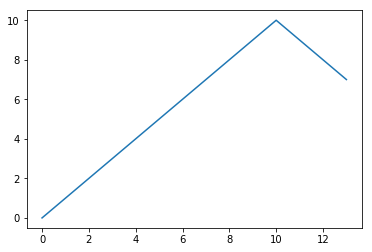

In [34]:
elev1.primeirachamada()
elev1.logico()
x=np.arange(0,len(elev1.histo))
y=elev1.histo
plt.plot(x,y)

Questão bônus II (0.5 ponto)   

Crie um simulador de prédio inteligente, controlando chamadas feitas para n > 1 elevadores:  

In [102]:
time.time()

1537375017.1877193

In [103]:
a=time.time()
while True:
    b=time.time()
    if b-a>1:
        print(b-a)
        a=b

1.000000238418579
1.0000038146972656
1.0000007152557373
1.0000026226043701
1.0000026226043701
1.0000014305114746
1.0000026226043701
1.0000004768371582
1.0000014305114746
1.0000007152557373
1.000002384185791
1.000000238418579
1.000000238418579
1.0000014305114746
1.0000004768371582
1.0000019073486328


KeyboardInterrupt: 

In [35]:
type(6.0)

float